In [4]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def drop_outliers(dataframe, column):
    col = dataframe[column].dropna()
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    # _, low, high = sigmaclip(dataframe[column].dropna(), low=3, high=3)
    print(lower, upper)
    # print(low, high)
    return dataframe[dataframe[column].isnull() | ((dataframe[column] >= lower) & (dataframe[column] <= upper))]


first_date = pd.to_datetime('2013-01-25')
last_date = pd.to_datetime('2019-10-10')
# last_date = pd.to_datetime('2019-10-04')
original_columns = ['№ эл-ра', 'Дата пуска', 'Дата откл.']

df = pd.read_excel('new_data.xlsx', usecols=original_columns)
df.columns = ['id', 'start_date', 'stop_date']
df.head()

,id,start_date,stop_date
0,641,2013-10-16,2014-05-16
1,624,2015-12-16,2016-11-21
2,459,2014-07-19,2015-09-20
3,2301,2018-06-28,2019-10-02
4,613,2014-09-02,2016-02-16


In [2]:
# df['d'] = (df.stop_date - df.start_date).dt.days
# df.sort_values(by='d', ascending=False).head()
# df.d.plot.box()

In [3]:
df[(df.start_date > first_date) & (df.start_date < last_date) & df.stop_date.notnull()].describe()

,id,start_date,stop_date
count,172.000000,172,172
mean,1052.459302,2015-06-08 15:46:02.790697728,2018-08-18 14:22:19.534883840
min,102.000000,2013-08-25 00:00:00,2014-05-16 00:00:00
25%,478.750000,2014-12-07 12:00:00,2018-03-15 00:00:00
50%,665.500000,2015-07-31 00:00:00,2018-11-25 00:00:00
75%,1577.000000,2015-12-06 00:00:00,2019-05-05 18:00:00
max,2386.000000,2018-06-28 00:00:00,2019-10-03 00:00:00
std,682.415467,NaN,NaN


In [4]:
df[df.stop_date.notnull()].describe()

,id,start_date,stop_date
count,172.000000,172,172
mean,1052.459302,2015-06-08 15:46:02.790697728,2018-08-18 14:22:19.534883840
min,102.000000,2013-08-25 00:00:00,2014-05-16 00:00:00
25%,478.750000,2014-12-07 12:00:00,2018-03-15 00:00:00
50%,665.500000,2015-07-31 00:00:00,2018-11-25 00:00:00
75%,1577.000000,2015-12-06 00:00:00,2019-05-05 18:00:00
max,2386.000000,2018-06-28 00:00:00,2019-10-03 00:00:00
std,682.415467,NaN,NaN


In [5]:
df.describe()

,id,start_date,stop_date
count,1555.000000,1555,172
mean,1324.409646,2016-12-14 18:47:55.369774848,2018-08-18 14:22:19.534883840
min,101.000000,2013-08-20 00:00:00,2014-05-16 00:00:00
25%,566.500000,2015-10-19 00:00:00,2018-03-15 00:00:00
50%,1448.000000,2016-12-10 00:00:00,2018-11-25 00:00:00
75%,1935.500000,2018-02-17 12:00:00,2019-05-05 18:00:00
max,2398.000000,2019-04-20 00:00:00,2019-10-03 00:00:00
std,708.585717,NaN,NaN


In [6]:
dup = df[(df.start_date > first_date) & (df.start_date < last_date) & df.stop_date.notnull()].copy()
dup['st_days'] = (dup.stop_date - dup.start_date).dt.days
dup.loc[dup.stop_date > last_date, 'cens_days'] = (last_date - pd.to_datetime(dup.start_date)).dt.days
dup.describe()

,id,start_date,stop_date,st_days,cens_days
count,172.000000,172,172,172.000000,0.0
mean,1052.459302,2015-06-08 15:46:02.790697728,2018-08-18 14:22:19.534883840,1166.941860,NaN
min,102.000000,2013-08-25 00:00:00,2014-05-16 00:00:00,212.000000,NaN
25%,478.750000,2014-12-07 12:00:00,2018-03-15 00:00:00,964.500000,NaN
50%,665.500000,2015-07-31 00:00:00,2018-11-25 00:00:00,1181.500000,NaN
75%,1577.000000,2015-12-06 00:00:00,2019-05-05 18:00:00,1365.500000,NaN
max,2386.000000,2018-06-28 00:00:00,2019-10-03 00:00:00,1984.000000,NaN
std,682.415467,NaN,NaN,324.913119,NaN


363.0 1967.0
Results from Fit_Weibull_3P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 169/0 (0% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha         1059.53           24.89   1011.85   1109.45
     Beta         3.44553        0.205818   3.06485   3.87349
    Gamma         219.666          134.33   66.2574   728.267 

Goodness of fit    Value
 Log-likelihood  -1206.5
           AICc  2419.14
            BIC  2428.38
             AD 0.596193 



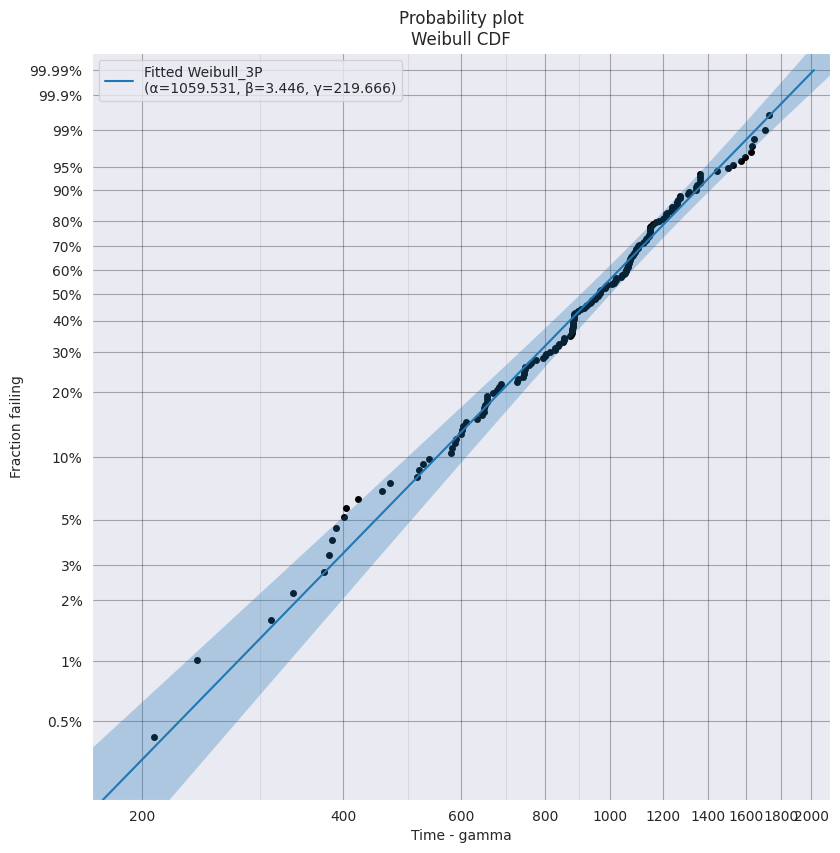

In [7]:
from reliability.Fitters import Fit_Weibull_3P

dup = drop_outliers(dup, 'st_days')
first = Fit_Weibull_3P(failures=np.array(dup.st_days))

Results from Fit_Weibull_3P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 169/0 (0% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha         1059.53           24.89   1011.85   1109.45
     Beta         3.44553        0.205818   3.06485   3.87349
    Gamma         219.666          134.33   66.2574   728.267 

Goodness of fit    Value
 Log-likelihood  -1206.5
           AICc  2419.14
            BIC  2428.38
             AD 0.596193 



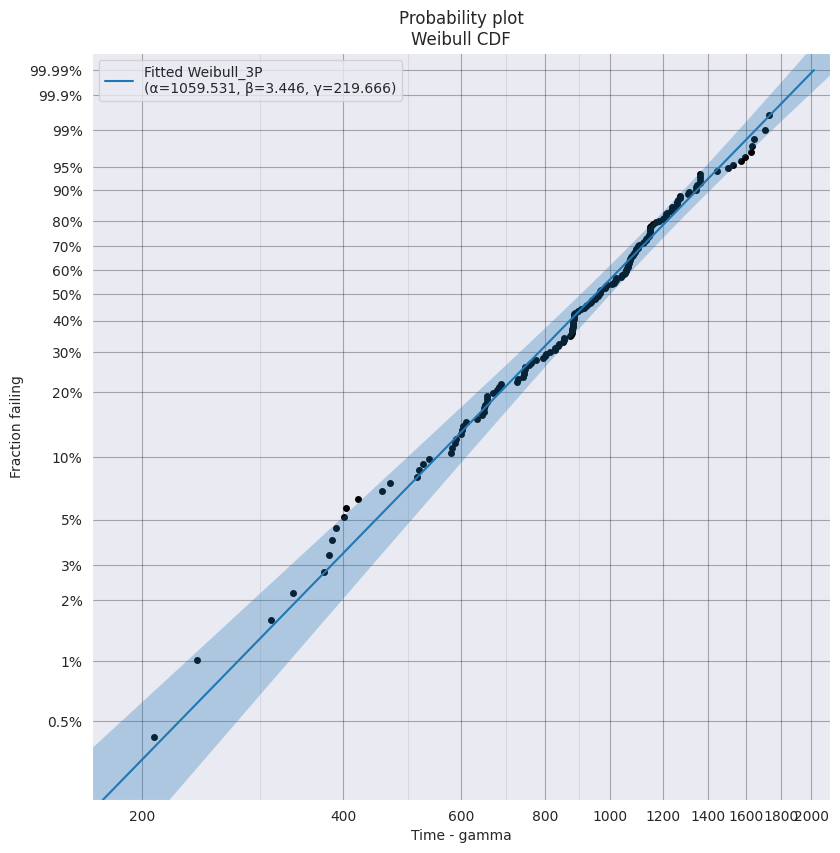

In [8]:
from reliability.Fitters import Fit_Weibull_CR

fail = dup[dup.cens_days.isnull()]
cens = dup[dup.cens_days.notnull()]
everything = Fit_Weibull_3P(failures=np.array(fail.st_days), right_censored=np.array(cens.cens_days))

array([0.00000000e+00, 0.00000000e+00, 4.71066340e-06, 6.28821318e-06,
       8.14157861e-06, 1.02840637e-05, 1.27282496e-05, 1.54860958e-05,
       1.85690184e-05, 2.19879551e-05, 2.57534169e-05, 2.98755322e-05,
       3.43640831e-05, 3.92285368e-05, 4.44780727e-05, 5.01216056e-05,
       5.61678057e-05, 6.26251171e-05, 6.95017729e-05, 7.68058101e-05,
       8.45450817e-05, 9.27272682e-05, 1.01359888e-04, 1.10450305e-04,
       1.20005741e-04, 1.30033279e-04, 1.40539873e-04, 1.51532352e-04,
       1.63017431e-04, 1.75001708e-04, 1.87491679e-04, 2.00493736e-04,
       2.14014171e-04, 2.28059185e-04, 2.42634889e-04, 2.57747307e-04,
       2.73402379e-04, 2.89605967e-04, 3.06363854e-04, 3.23681752e-04,
       3.41565298e-04, 3.60020062e-04, 3.79051546e-04, 3.98665188e-04,
       4.18866364e-04, 4.39660389e-04, 4.61052519e-04, 4.83047954e-04,
       5.05651838e-04, 5.28869261e-04, 5.52705263e-04, 5.77164831e-04,
       6.02252904e-04, 6.27974374e-04, 6.54334084e-04, 6.81336835e-04,
      

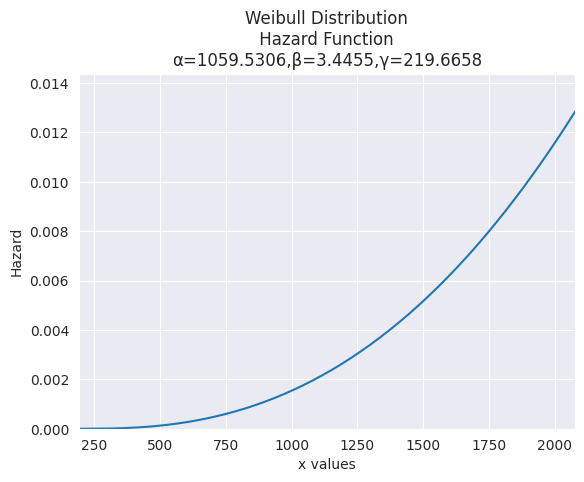

In [9]:
from reliability.Other_functions import histogram, make_right_censored_data

# histogram(np.array(dup.st_days))
# first.distribution.PDF()
# everything.distribution.PDF()
everything.distribution.HF()

In [28]:
from scipy.stats import sigmaclip

print(len(df))


def drop_outliers(dataframe, column):
    col = dataframe[column].dropna()
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    # _, low, high = sigmaclip(dataframe[column].dropna(), low=3, high=3)
    print(lower, upper)
    # print(low, high)
    return dataframe[dataframe[column].isnull() | ((dataframe[column] >= lower) & (dataframe[column] <= upper))]


df = drop_outliers(df, 'stopped_days')
print(len(df))
# df.tail()

1555
363.0 1967.0
1552


In [ ]:
df.describe()

In [ ]:
df.describe()

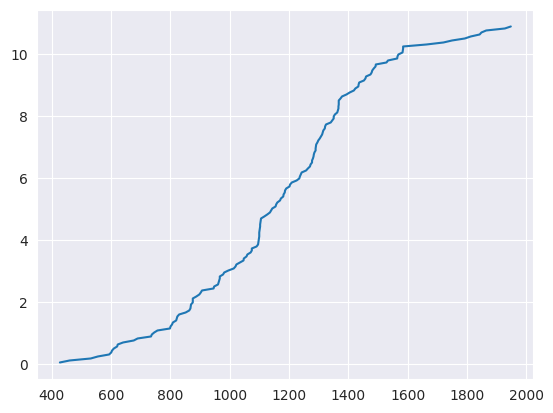

In [43]:
# df.stopped_days.plot.hist(density=True, cumulative=1)
def plot_something():
    alls = len(df)
    x = np.array(df.stopped_days.dropna())
    x.sort()
    y = [((i + 1) / alls) * 100 for i in range(len(x))]
    plt.plot(x, y)

    # print(alls, x, y)


plot_something()

# df.stopped_days.plot.hist()

In [6]:
df.loc[df.stop_date.notnull(), 'stopped_days'] = (df.stop_date - df.start_date).dt.days
df.loc[df.stop_date.isnull(), 'running_days'] = (last_date - pd.to_datetime(df.start_date)).dt.days
df.describe()

,id,start_date,stop_date,stopped_days,running_days
count,1555.000000,1555,172,172.000000,1383.000000
mean,1324.409646,2016-12-14 18:47:55.369774848,2018-08-18 14:22:19.534883840,1166.941860,960.177151
min,101.000000,2013-08-20 00:00:00,2014-05-16 00:00:00,212.000000,173.000000
25%,566.500000,2015-10-19 00:00:00,2018-03-15 00:00:00,964.500000,555.000000
50%,1448.000000,2016-12-10 00:00:00,2018-11-25 00:00:00,1181.500000,938.000000
75%,1935.500000,2018-02-17 12:00:00,2019-05-05 18:00:00,1365.500000,1343.000000
max,2398.000000,2019-04-20 00:00:00,2019-10-03 00:00:00,1984.000000,2242.000000
std,708.585717,NaN,NaN,324.913119,480.245430


In [8]:
tr_df = df[(df.start_date > first_date) & (df.start_date < last_date)]
tr_df.describe()

,id,start_date,stop_date,stopped_days,running_days
count,1555.000000,1555,172,172.000000,1383.000000
mean,1324.409646,2016-12-14 18:47:55.369774848,2018-08-18 14:22:19.534883840,1166.941860,960.177151
min,101.000000,2013-08-20 00:00:00,2014-05-16 00:00:00,212.000000,173.000000
25%,566.500000,2015-10-19 00:00:00,2018-03-15 00:00:00,964.500000,555.000000
50%,1448.000000,2016-12-10 00:00:00,2018-11-25 00:00:00,1181.500000,938.000000
75%,1935.500000,2018-02-17 12:00:00,2019-05-05 18:00:00,1365.500000,1343.000000
max,2398.000000,2019-04-20 00:00:00,2019-10-03 00:00:00,1984.000000,2242.000000
std,708.585717,NaN,NaN,324.913119,480.245430


Results from Fit_Weibull_DS (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 172/1383 (88.93891% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha         1663.06         106.898   1466.21   1886.35
     Beta         4.14774        0.293327   3.61089    4.7644
       DS        0.468453        0.076948   0.32475  0.617586 

Goodness of fit    Value
 Log-likelihood -1587.18
           AICc  3180.38
            BIC  3196.41
             AD  1219.76 



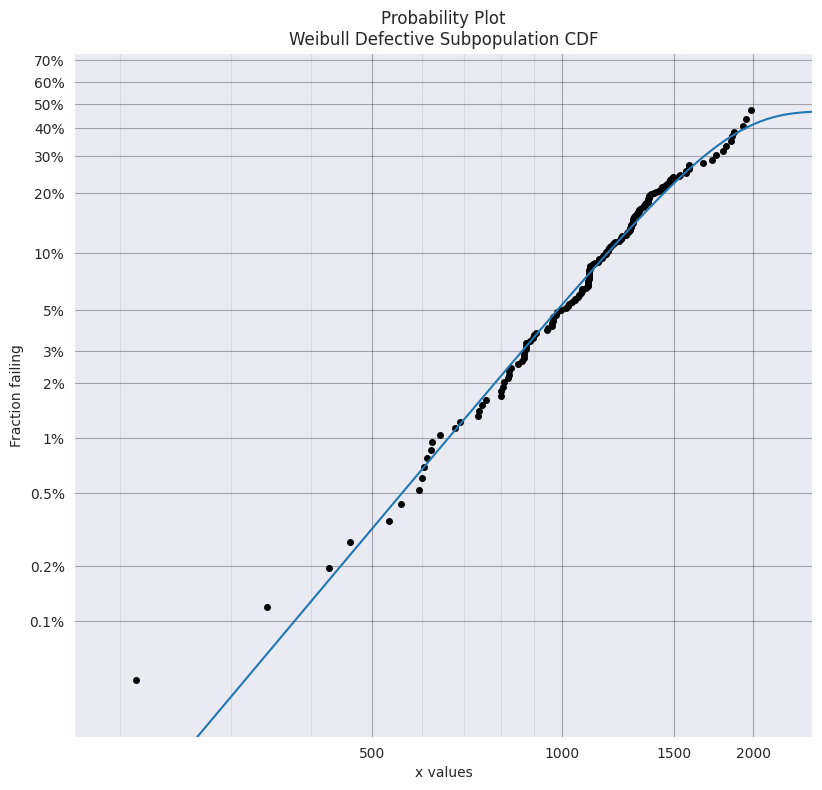

In [50]:
from reliability.Fitters import Fit_Weibull_DS, Fit_Weibull_2P

fit = Fit_Weibull_DS(failures=np.array(tr_df[tr_df.stopped_days.notnull()].stopped_days),
                     right_censored=np.array(tr_df[tr_df.running_days.notnull()].running_days))
# fit = Fit_Weibull_2P(failures=np.array(tr_df[tr_df.stopped_days.notnull()].stopped_days), show_probability_plot=False)
# print(fit.AD)
# fit.distribution.SF()

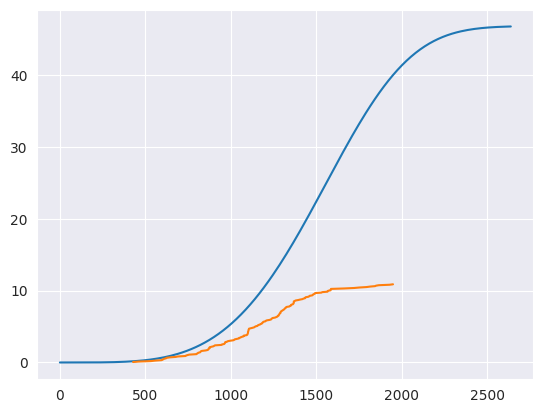

In [51]:
from scipy.stats import weibull_min


# values = fit.distribution.CDF()


def find_max(shape, scale):
    return scale * np.power(-np.log(0.001), 1 / shape)


def weibull_cdf(shape, scale, count):
    max_smth = find_max(shape, scale)
    x = np.arange(0, max_smth, max_smth / count)
    y = 1 - np.exp(-np.power(x / scale, shape))
    return x, y


x_q, y_q = weibull_cdf(fit.beta, fit.alpha, 200)
# y_q *= fit.DS

# print(find_max(fit.beta, fit.alpha))
#
#
# def plot_something(x, y):
#     x.sort()
#     plt.plot(x, y * 100)
# plt.plot(x_q, y_q * 100 * len(df[df.stop_date.notnull()]) / len(df))
plt.plot(x_q, y_q * 100 * fit.DS)
# plot_something(x_q, y_q)
plot_something()
#
#
# print(values)

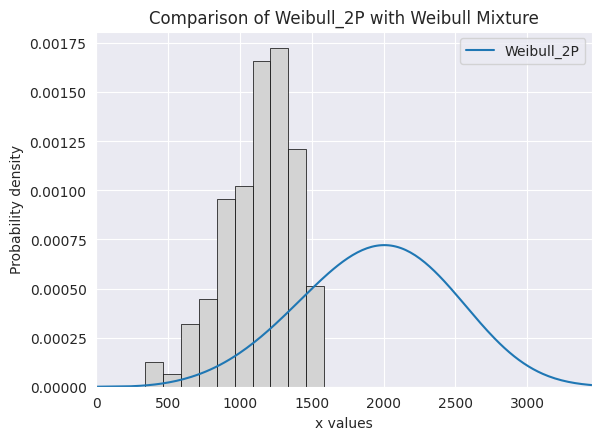

In [50]:
from reliability.Other_functions import histogram, make_right_censored_data

histogram(np.array(tr_df.stopped_days.dropna()))
# mixture.distribution.PDF(label='Weibull Mixture')
fit.distribution.PDF(label='Weibull_2P')
plt.title('Comparison of Weibull_2P with Weibull Mixture')
plt.legend()
plt.show()

array([1.00000000e+00, 9.99900000e-01, 9.99865815e-01, 9.99823475e-01,
       9.99771760e-01, 9.99709362e-01, 9.99634885e-01, 9.99546843e-01,
       9.99443664e-01, 9.99323685e-01, 9.99185156e-01, 9.99026236e-01,
       9.98844998e-01, 9.98639425e-01, 9.98407413e-01, 9.98146769e-01,
       9.97855214e-01, 9.97530381e-01, 9.97169818e-01, 9.96770987e-01,
       9.96331266e-01, 9.95847949e-01, 9.95318247e-01, 9.94739292e-01,
       9.94108136e-01, 9.93421752e-01, 9.92677037e-01, 9.91870814e-01,
       9.90999834e-01, 9.90060779e-01, 9.89050261e-01, 9.87964831e-01,
       9.86800977e-01, 9.85555127e-01, 9.84223655e-01, 9.82802886e-01,
       9.81289093e-01, 9.79678510e-01, 9.77967330e-01, 9.76151712e-01,
       9.74227786e-01, 9.72191658e-01, 9.70039418e-01, 9.67767139e-01,
       9.65370892e-01, 9.62846746e-01, 9.60190777e-01, 9.57399077e-01,
       9.54467757e-01, 9.51392959e-01, 9.48170860e-01, 9.44797685e-01,
       9.41269712e-01, 9.37583281e-01, 9.33734805e-01, 9.29720779e-01,
      

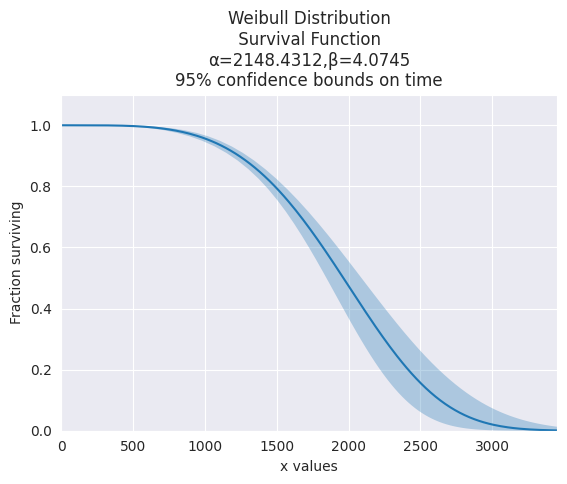

In [52]:
fit.distribution.SF()

Results from Kolmogorov-Smirnov test:
Kolmogorov-Smirnov statistic: 0.7577502934110346
Kolmogorov-Smirnov critical value: 0.1195846588872876
At the 0.05 significance level, we can REJECT the hypothesis that the data comes from a weibull distribution (α=2148.4312,β=4.0745)


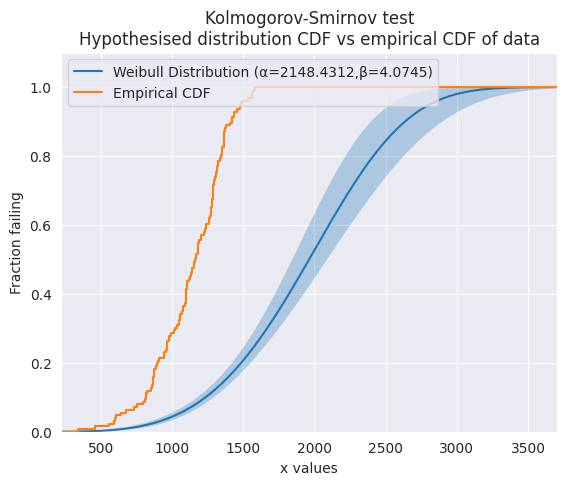

In [31]:
from reliability.Reliability_testing import KStest

KStest(fit.distribution, np.array(tr_df.stopped_days.dropna()))

array([0.00000000e+00, 2.08118469e-06, 2.71734940e-06, 3.46103893e-06,
       4.31842462e-06, 5.29544383e-06, 6.39782024e-06, 7.63107930e-06,
       9.00056015e-06, 1.05114244e-05, 1.21686626e-05, 1.39770984e-05,
       1.59413915e-05, 1.80660383e-05, 2.03553720e-05, 2.28135611e-05,
       2.54446065e-05, 2.82523386e-05, 3.12404127e-05, 3.44123038e-05,
       3.77713008e-05, 4.13204999e-05, 4.50627973e-05, 4.90008816e-05,
       5.31372254e-05, 5.74740762e-05, 6.20134474e-05, 6.67571086e-05,
       7.17065752e-05, 7.68630983e-05, 8.22276536e-05, 8.78009307e-05,
       9.35833221e-05, 9.95749111e-05, 1.05775461e-04, 1.12184404e-04,
       1.18800827e-04, 1.25623465e-04, 1.32650684e-04, 1.39880474e-04,
       1.47310436e-04, 1.54937772e-04, 1.62759272e-04, 1.70771309e-04,
       1.78969824e-04, 1.87350319e-04, 1.95907852e-04, 2.04637022e-04,
       2.13531967e-04, 2.22586357e-04, 2.31793389e-04, 2.41145779e-04,
       2.50635763e-04, 2.60255094e-04, 2.69995037e-04, 2.79846374e-04,
      

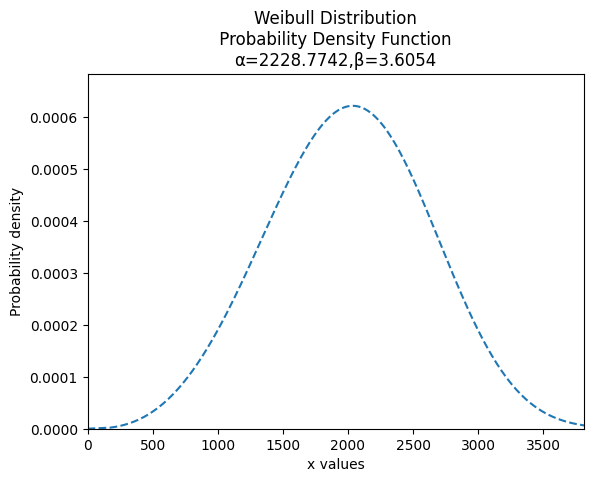

In [40]:
fit.distribution.PDF(label='Fitted', linestyle='--')

<Axes: ylabel='Frequency'>

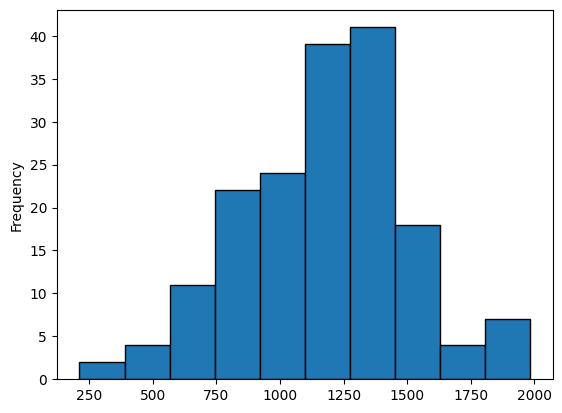

In [41]:
df['stopped_days'].plot.hist(edgecolor='black')
print(min(df['stopped_days']), max(df['stopped_days']))

<Axes: ylabel='Frequency'>

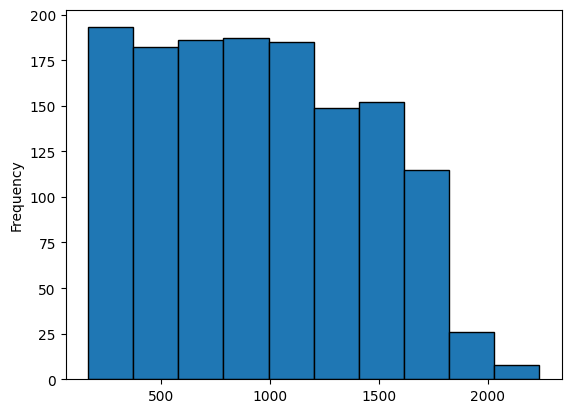

In [42]:
df['running_days'].plot.hist(edgecolor='black')
print(min(df['running_days']), max(df['running_days']))

In [8]:
duplicated = df[df.duplicated('id', keep=False)]
duplicated['id'].value_counts()

id
641     3
408     3
309     2
1366    2
329     2
       ..
285     2
1343    2
1419    2
1448    2
2389    2
Name: count, Length: 122, dtype: int64

In [14]:
df['days'] = (df['shutdown_date'] - df['release_date']).dt.days
print(df)

       id release_date shutdown_date  shutdown_life  avg_lifetime  days
0     641   2013-10-16    2014-05-16        6.96509       6.96509   212
1     624   2015-12-16    2016-11-21        11.2033       9.08419   341
2     459   2014-07-19    2015-09-20        14.0616       10.7433   428
3    2301   2018-06-28    2019-10-02        15.1645       11.8486   461
4     613   2014-09-02    2016-02-16        17.4784       12.9746   532
5    1773   2015-04-28    2016-11-04        18.2669       13.8566   556
6    2105   2015-08-01    2017-03-17        19.5154        14.665   594
7     528   2013-10-17    2015-06-10        19.7454       15.3001   601
8    2360   2015-08-13    2017-04-14        20.0411       15.8269   610
9     408   2013-10-28    2015-07-11        20.4025       16.2844   621
10   1283   2014-11-22    2016-08-06        20.4682       16.6648   623
11    222   2015-08-03    2017-05-05        21.0595        17.031   641
12   1783   2015-06-24    2017-05-01        22.2423       17.431

<Axes: ylabel='Frequency'>

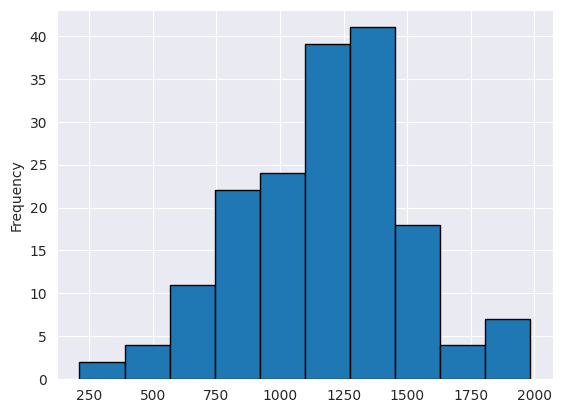

In [15]:
import matplotlib.pyplot as plt

df['days'].plot.hist(edgecolor='black')

<Axes: xlabel='shutdown_life', ylabel='Density'>

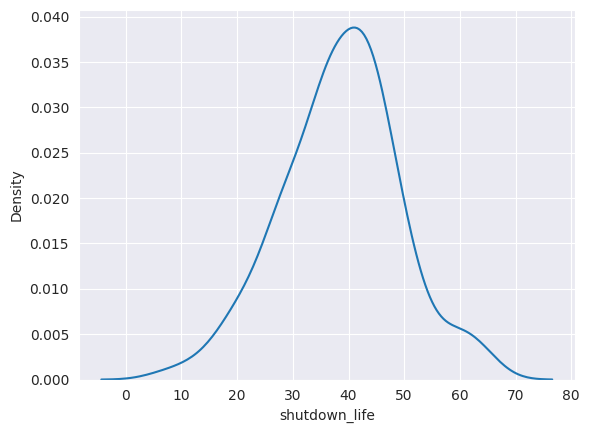

In [16]:
# df['shutdown_life'].plot.kde()
sns.kdeplot(df['shutdown_life'])

Results from Fit_Weibull_3P (95% CI):
Analysis method: Least Squares Estimation (NLLS)
Failures / Right censored: 172/0 (0% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha          1285.6         25.7807   1236.05   1337.14
     Beta         4.00162        0.234624    3.5672   4.48894
    Gamma               0               0         0         0 

Goodness of fit    Value
 Log-likelihood -1238.82
           AICc  2483.78
            BIC  2493.08
             AD 0.704889 



array([1.00000000e+00, 9.99900000e-01, 9.99864539e-01, 9.99820390e-01,
       9.99766239e-01, 9.99700680e-01, 9.99622213e-01, 9.99529248e-01,
       9.99420101e-01, 9.99293000e-01, 9.99146078e-01, 9.98977382e-01,
       9.98784863e-01, 9.98566388e-01, 9.98319732e-01, 9.98042582e-01,
       9.97732538e-01, 9.97387113e-01, 9.97003734e-01, 9.96579744e-01,
       9.96112404e-01, 9.95598890e-01, 9.95036300e-01, 9.94421653e-01,
       9.93751890e-01, 9.93023878e-01, 9.92234409e-01, 9.91380208e-01,
       9.90457928e-01, 9.89464160e-01, 9.88395430e-01, 9.87248205e-01,
       9.86018897e-01, 9.84703865e-01, 9.83299419e-01, 9.81801824e-01,
       9.80207306e-01, 9.78512053e-01, 9.76712225e-01, 9.74803953e-01,
       9.72783349e-01, 9.70646510e-01, 9.68389524e-01, 9.66008477e-01,
       9.63499458e-01, 9.60858565e-01, 9.58081917e-01, 9.55165656e-01,
       9.52105957e-01, 9.48899037e-01, 9.45541160e-01, 9.42028648e-01,
       9.38357891e-01, 9.34525353e-01, 9.30527583e-01, 9.26361224e-01,
      

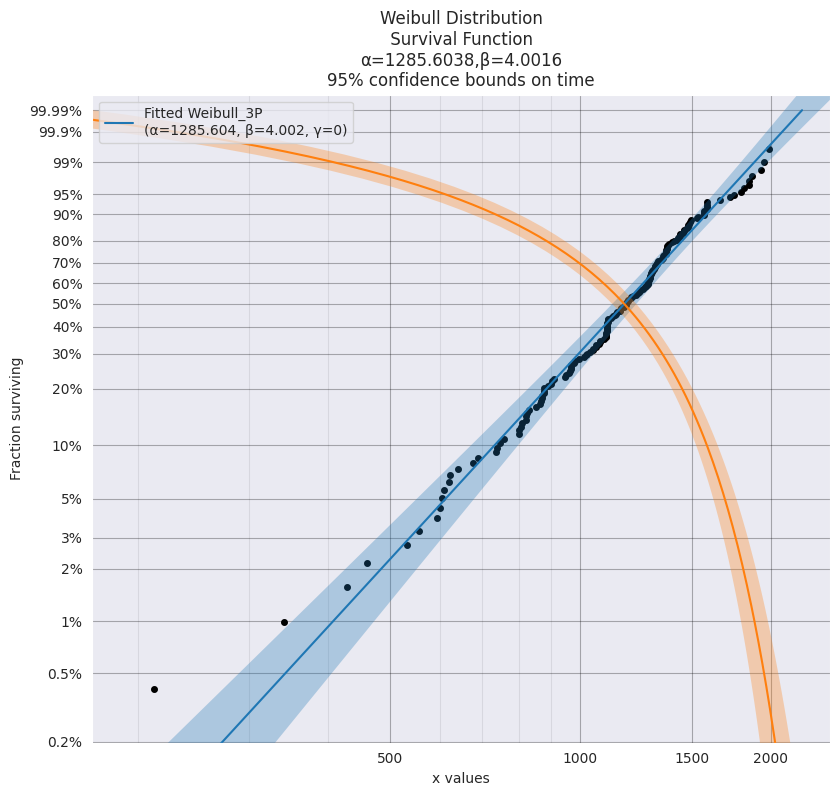

In [19]:
from reliability.Fitters import Fit_Weibull_3P

fit = Fit_Weibull_3P(failures=np.array(df['days']), method='LS')
fit.distribution.SF()

array([1.00000000e+00, 9.99900000e-01, 9.99864539e-01, 9.99820390e-01,
       9.99766239e-01, 9.99700680e-01, 9.99622213e-01, 9.99529248e-01,
       9.99420101e-01, 9.99293000e-01, 9.99146079e-01, 9.98977382e-01,
       9.98784864e-01, 9.98566389e-01, 9.98319733e-01, 9.98042583e-01,
       9.97732539e-01, 9.97387114e-01, 9.97003736e-01, 9.96579746e-01,
       9.96112406e-01, 9.95598893e-01, 9.95036303e-01, 9.94421657e-01,
       9.93751894e-01, 9.93023882e-01, 9.92234414e-01, 9.91380213e-01,
       9.90457934e-01, 9.89464166e-01, 9.88395437e-01, 9.87248212e-01,
       9.86018905e-01, 9.84703874e-01, 9.83299429e-01, 9.81801835e-01,
       9.80207317e-01, 9.78512066e-01, 9.76712238e-01, 9.74803967e-01,
       9.72783364e-01, 9.70646526e-01, 9.68389542e-01, 9.66008496e-01,
       9.63499477e-01, 9.60858586e-01, 9.58081939e-01, 9.55165680e-01,
       9.52105982e-01, 9.48899063e-01, 9.45541187e-01, 9.42028677e-01,
       9.38357922e-01, 9.34525385e-01, 9.30527617e-01, 9.26361259e-01,
      

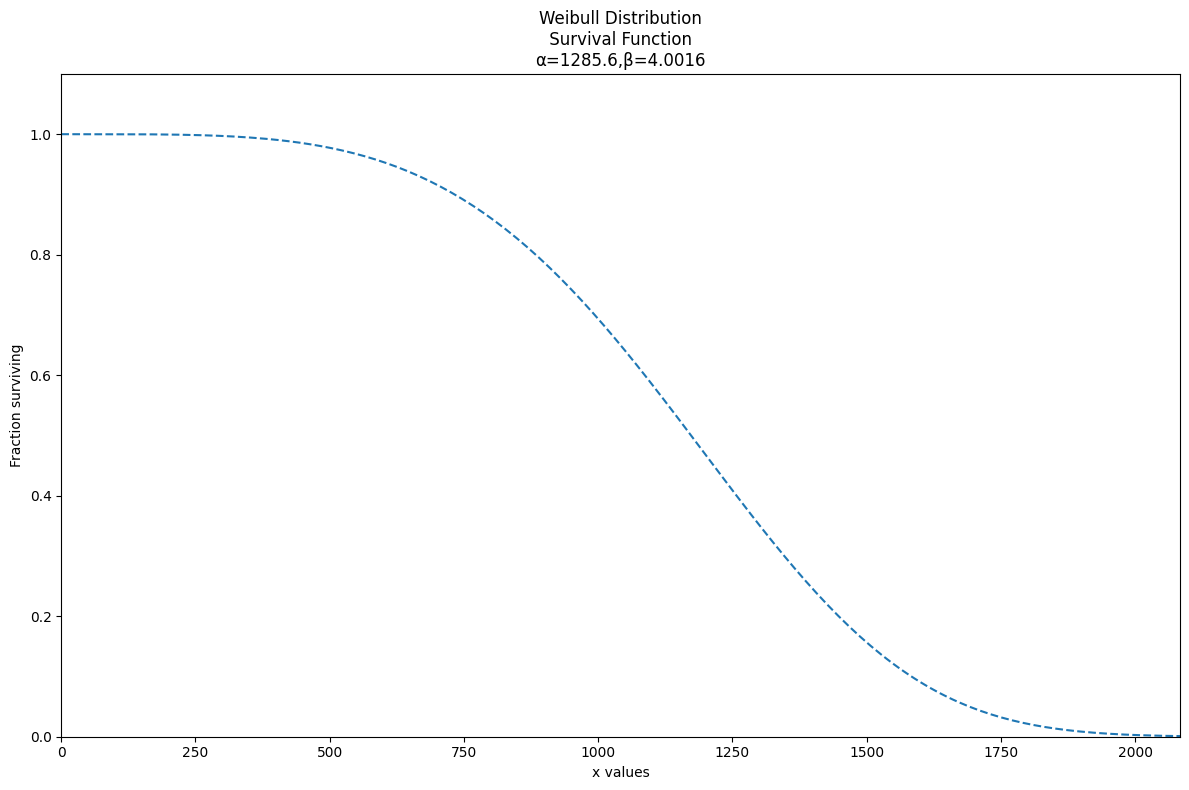

In [43]:
from reliability.Distributions import Weibull_Distribution

dist = Weibull_Distribution(alpha=1285.6, beta=4.00162)
dist.SF()

### Save to CSV

In [6]:
df.to_csv('data.csv')

In [23]:
np.concatenate([trimmed_df['stopped_days'].dropna(), trimmed_df['running_days'].dropna()])

array([341., 461., 556., ..., 537., 462., 516.])

In [21]:
import surpyval as surv

model = surv.Weibull.fit(x, c, n)
print(model)
model.plot()

AttributeError: module 'surpyval' has no attribute 'Boston'